In [87]:
library(tidyverse)
library(repr)
library(readxl)
library(rvest)
library(lubridate)
library(tidymodels)

In [88]:
data <- read.csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")
data_2 <- read.csv("https://covid.ourworldindata.org/data/ecdc/locations.csv")
head(data)
head(data_2)

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-12-31,Afghanistan,0,0,NA,NA,NA,NA,NA,NA
2,2020-01-01,Afghanistan,0,0,NA,NA,NA,NA,NA,NA
3,2020-01-02,Afghanistan,0,0,NA,NA,NA,NA,NA,NA
4,2020-01-03,Afghanistan,0,0,NA,NA,NA,NA,NA,NA
5,2020-01-04,Afghanistan,0,0,NA,NA,NA,NA,NA,NA
6,2020-01-05,Afghanistan,0,0,NA,NA,NA,NA,NA,NA


,countriesAndTerritories,location,continent,population_year,population
,<chr>,<chr>,<chr>,<int>,<int>
1,Afghanistan,Afghanistan,Asia,2020,38928341
2,Albania,Albania,Europe,2020,2877800
3,Algeria,Algeria,Africa,2020,43851043
4,Andorra,Andorra,Europe,2020,77265
5,Angola,Angola,Africa,2020,32866268
6,Anguilla,Anguilla,North America,2020,15002


In [89]:
covid_data <- mutate(data, date = as.Date(date, format= "%Y-%m-%d"))


In [108]:
covid_monthly_data <- covid_data %>%
    group_by(month = floor_date(date, "month"),location) %>%
    summarize(new_cases = sum(new_cases)) %>%
    arrange(location)

head(covid_monthly_data,n=60)

`summarise()` regrouping output by 'month' (override with `.groups` argument)



month,location,new_cases
<date>,<chr>,<int>
2019-12-01,Afghanistan,0
2020-01-01,Afghanistan,0
2020-02-01,Afghanistan,1
2020-03-01,Afghanistan,NA
2020-04-01,Afghanistan,1808
2020-05-01,Afghanistan,12576
2020-06-01,Afghanistan,16713
2020-07-01,Afghanistan,5304
2020-08-01,Afghanistan,1620


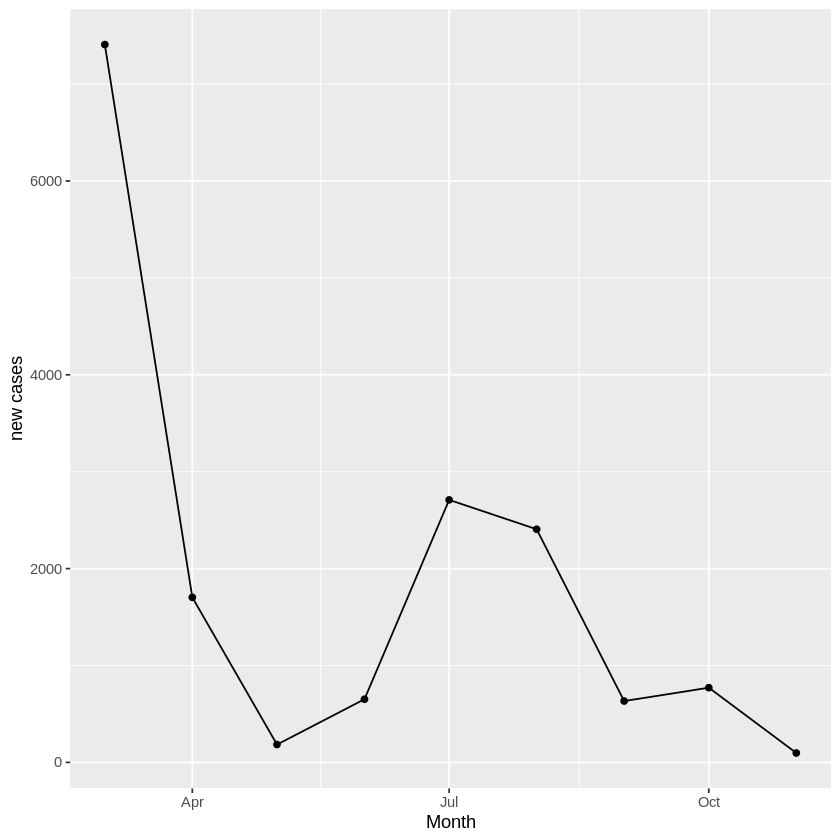

In [95]:
covid_plot <- covid_monthly_data %>%
            ggplot(aes(x = month, y = new_cases))+
                   geom_point()+
                   geom_line()+
                   labs(x="Month",y= "new cases")
covid_plot